'''''
{
"title": "Data-Modelling-Checklist",
"keywords": "DataPreprocessing, ",
"categories": "",
"description": "Hier geht es um die individuelle Abarbeitung der <em>EDA</em>-Checkliste im Kontext der California-Housing Problematik",
"level": "50",
"pageID": "16112020-10-California-Housing-Data-Preprocessing-Checklist"
}
'''''

<center><h1>California Housing <br>Data Modeling<br>&<br>Fine Tuning</h1></center>

![](imgs/2020-11-14-21-31-19.png)

# Vorgelagerte Ausarbeitungen
- [1. Big-Picture](14112020-10-California-Housing-BigPicture)<br>
- [2. Data-Management](14112020-10-California-Housing-Data)<br>
- [3. EDA](16112020-10-California-Housing-EDA)<br>
- [4. Data-Preprocessing](16112020-10-California-Housing-Data-Preprocessing-Checklist)<br>

# [Algorithm-Modeling](19112020-ShortListModels)

In diesem Notebook wird die [First-Algorithms-Checkliste](19112020-ShortListModels) im Kontext des California-Housing Problem abgeabreitet. Bei dieser Checkliste geht es darum, erstmalig Algorithmen anzuwenden und deren Performance grunlegend zu prüfen.

# [Algorithm-Fine-Tuning]()
Diese Notebook arbeitet zeitlgeich die [Fine-Tuning-Checkliste](14112020-10-California-Housing-Data) ab. Es ist erheblich hantlicher bei der Modelierung in einem Notebook zu bleibe. Es wäre zwar grundsätzlich möglich die trainierten Algorithmen zu speichern un in anderen Notebooks wieder zu öffnen, jedoch ist es komfortabler in einem Notebook hierbei zu arbeiten.

# Laden der Daten
Die Daten wurden bereits im vorherigen [Notebook - California Housing Priceses Data](14112020-10-California-Housing-Data) gesplittet und persistent auf der Festplatte gespeichert. Somit müssen diese Daten in diesem Notebook zunächst geladen werden. Die Funktion Daten-Laden wurde in diesem Notebook der übersichtlichkeit wegen ebenfalls ausgelagert.



In [1]:
# To support both python 2 and python 3

import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np

import FunctionFileCalifornia as ffc

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Basic Variables
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

.\images\end_to_end_project


In [2]:
# Laden der Daten und adaptieren des Indexes
train_set = ffc.load_housing_data(filename="train-prepared-Feature.csv")
train_set = train_set.set_index('index')

train_labels = ffc.load_housing_data(filename="train-prepared-Labels.csv")
train_labels = train_labels.set_index('index')

test_set = ffc.load_housing_data(filename="test-prepared-Feature.csv")
test_set = test_set.set_index('index')

test_labels = ffc.load_housing_data(filename="test-prepared-Labels.csv")
test_labels = test_labels.set_index('index')


print(train_set.shape)
print(train_labels.shape)
print(test_set.shape)
print(test_labels.shape)
'''
print(train_set.head())
print(train_labels.head())
print(test_set.head())
print(test_labels.head())
'''

(16512, 17)
(16512, 1)
(4128, 17)
(4128, 1)


'\nprint(train_set.head())\nprint(train_labels.head())\nprint(test_set.head())\nprint(test_labels.head())\n'

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, median_absolute_error

def calculate_performance(prediction, actual, scaler):
    p = scaler.inverse_transform(prediction.reshape(-1,1))
    a = scaler.inverse_transform(actual.reshape(-1,1))
    mse = mean_squared_error(p, a)
    err = np.sqrt(mse)
    r2 = r2_score(a, p)
    mae = median_absolute_error(p, a)
    
    return (mse, err, r2, mae)

def print_performance(measure_tuple):
    
    mse = measure_tuple[0]
    err = measure_tuple[1]
    r2 = measure_tuple[2]
    mae = measure_tuple[3]
    
    print("Mean squared error is {}".format(str(mse)))
    print("Positive mean error is {}".format(str(err)))
    print("Overall R² is {}".format(str(r2)))
    print("Median absolute error is {}".format(str(mae)))

# Train Model

In [4]:
# Liste der Performance-Vergleiche
resultList = []
print(type(resultList))

<class 'list'>


## Lineare Regression

In [5]:
# Die folgenden 3 Zeilen genügen um ein Model zu erstellen und zu trainieren
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set, train_labels)
lin_reg.score(test_set, test_labels)


0.6576014402233354

In [6]:
# FeatureImportance
importance = lin_reg.coef_
featureImportance = []
for i in range(0, len(importance[0]),1):
    feature = train_set.columns[i]
    specificImportance = importance[0][i]
    featureImportance.append([feature, specificImportance])
    #print(feature, specificImportance)   
print(featureImportance)

[['longitude', -54351.712905772016], ['latitude', -55446.55764966471], ['housing_median_age', 14484.399545536615], ['total_rooms', -3990.6352368220223], ['total_bedrooms', 9130.301566577078], ['population', -44812.96023385288], ['households', 44533.861471022545], ['median_income', 63511.40207034306], ['ocean_proximity', 14202.986271291938], ['income_cat', 6427.979250867132], ['rooms_per_household', 975.6353415798012], ['population_per_household', 10600.000703069374], ['ocean_proximity_<1H OCEAN', 3.973830549219377e+17], ['ocean_proximity_INLAND', 3.9738305492190163e+17], ['ocean_proximity_ISLAND', 3.9738305492207443e+17], ['ocean_proximity_NEAR BAY', 3.9738305492193325e+17], ['ocean_proximity_NEAR OCEAN', 3.973830549219421e+17]]


In [7]:
# test einer möglichen Prediction, das dient nur der Veranschaulichung
some_data = train_set.iloc[:5]
some_true_labels = train_labels.iloc[:5]
some_predictions = lin_reg.predict(some_data)

print("Predictions:", list(some_predictions))
print("Wahre Werte:", list(some_true_labels))

Predictions: [array([203840.]), array([326528.]), array([204544.]), array([58304.]), array([194240.])]
Wahre Werte: ['median_house_value']


In [8]:
# Performance Measure OLS

In [9]:
housing_predictions_ols = lin_reg.predict(test_set)

In [10]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(test_labels, housing_predictions_ols)
print(lin_mae)

49483.498062015504


In [11]:
## MSE
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_labels, housing_predictions_ols)
print(lin_mse)

4462015589.36531


In [12]:
## RMSE
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

66798.32025856122


In [13]:
#listEnty = ["OLS", lin_mae, lin_mse, lin_rmse, featureImportance]
listEnty = ["OLS", lin_mae, lin_mse, lin_rmse]
resultList.append(listEnty)

##  Polynomiale Regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_feature_extractor = PolynomialFeatures(degree=1)
polynomial_feature_extractor.fit(train_set, train_labels)

poly_train_data_X = polynomial_feature_extractor.transform(train_set)
poly_test_data_X = polynomial_feature_extractor.transform(test_set)

poly_regressor = LinearRegression()
poly_regressor.fit(poly_train_data_X, train_labels)

poly_predicted_y = poly_regressor.predict(poly_test_data_X)

poly_mae = mean_absolute_error(test_labels, poly_predicted_y)
poly_mse = mean_squared_error(test_labels, poly_predicted_y)
poly_rmse = np.sqrt(poly_mse)

#print(poly_mae)
#print(poly_mse)
#print(poly_rmse)

importance = poly_regressor.coef_
print(len(importance[0]))

18


In [15]:
'''featureImportance = []
for i in range(0, len(importance[0]),1):
    feature = train_set.columns[i]
    specificImportance = importance[0][i]
    featureImportance.append([feature, specificImportance])
    #print(feature, specificImportance)   
print(featureImportance)
'''

listEnty = ["Poly-Reg", poly_mae, poly_mse, poly_rmse]
resultList.append(listEnty)

## Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

# small alpha --> little restriction on coefficients
lasso_regressor = Lasso(alpha=0.01, max_iter=1000)
lasso_regressor.fit(train_set, train_labels)

C:\Users\1810837475\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6340902440107.633, tolerance: 22103585513.765118
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [17]:
lasso_predicted_y = lasso_regressor.predict(test_set)

In [18]:
lasso_mae = mean_absolute_error(test_labels, lasso_predicted_y)
lasso_mse = mean_squared_error(test_labels, lasso_predicted_y)
lasso_rmse = np.sqrt(lasso_mse)


In [19]:
# Feature Importance
featureImportance = []
importance = lasso_regressor.coef_
for i in range(0, len(importance),1):
    feature = train_set.columns[i]
    specificImportance = importance[i]
    featureImportance.append([feature, specificImportance])
    #print(feature, specificImportance)   

#listEnty = ["Poly-Reg", poly_mae, poly_mse, poly_rmse, featureImportance]
listEnty = ["Poly-Reg", poly_mae, poly_mse, poly_rmse]
resultList.append(listEnty)

In [20]:
print(lasso_mae)
print(lasso_mse)
print(lasso_rmse)

listEnty = ["Lasso-Reg", lasso_mae, lasso_mse, lasso_rmse]
resultList.append(listEnty)

49458.05475606995
4461389041.578401
66793.63024704078


## Regression-Decision-Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set, train_labels)

housing_predictions_dtr = tree_reg.predict(test_set)
#print(housing_predictions_dtr)
#print(test_labels)

tree_mae = mean_absolute_error(test_labels, housing_predictions_dtr)
tree_mse = mean_squared_error(test_labels, housing_predictions_dtr)
tree_rmse = np.sqrt(tree_mse)


print(tree_mae)
print(tree_mse)
print(tree_rmse)

75607.39583333333
12277961800.540213
110805.96464333593


In [22]:
# Feature Importance
featureImportance = []
importance = tree_reg.feature_importances_
#print(importance)
#print(len(importance))
for i in range(0, len(importance),1):
    feature = train_set.columns[i]
    specificImportance = importance[i]
    featureImportance.append([feature, specificImportance])
#listEnty = ["RegTree", tree_mae, tree_mse, tree_rmse, featureImportance]
listEnty = ["RegTree", tree_mae, tree_mse, tree_rmse]
resultList.append(listEnty)

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(train_set, train_labels)

<ipython-input-23-6bfaa24301ce>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(train_set, train_labels)


RandomForestRegressor()

In [24]:
forest_prediction = forest_reg.predict(test_set)

RF_mae = mean_absolute_error(test_labels, forest_prediction)
RF_mse = mean_squared_error(test_labels, forest_prediction)
RF_rmse = np.sqrt(RF_mse)


print(RF_mae)
print(RF_mse)
print(RF_rmse)

56528.563829941864
6167940977.204143
78536.23989728655


In [34]:
# Feature Importance
featureImportance = []
importance = forest_reg.feature_importances_
#print(importance)
#print(len(importance))
for i in range(0, len(importance),1):
    feature = train_set.columns[i]
    specificImportance = importance[i]
    featureImportance.append([feature, specificImportance])
#listEnty = ["RegTree", tree_mae, tree_mse, tree_rmse, featureImportance]
listEnty = ["RandForest", RF_mae, RF_mse, RF_rmse]
resultList.append(listEnty)

# Suport Vector Regressor

In [47]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(train_set, train_labels)

C:\Users\1810837475\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [48]:
svm_prediction = svm.predict(test_set)

svm_mae = mean_absolute_error(test_labels, svm_prediction)
svm_mse = mean_squared_error(test_labels, svm_prediction)
svm_rmse = np.sqrt(RF_mse)


print(svm_mae)
print(svm_mse)
print(svm_rmse)

importance = svm.coef_

117353.23231589147
27098628985.039486
78536.23989728655


In [49]:
listEnty = ["SVM", svm_mae, svm_mse, svm_rmse]
resultList.append(listEnty)

# Print-Results

In [50]:
print(resultList)
print(len(resultList))

[['OLS', 49483.498062015504, 4462015589.36531, 66798.32025856122], ['Poly-Reg', 49458.03301952227, 4461384770.505101, 66793.59827487289], ['Poly-Reg', 49458.03301952227, 4461384770.505101, 66793.59827487289], ['Lasso-Reg', 49458.05475606995, 4461389041.578401, 66793.63024704078], ['RegTree', 75607.39583333333, 12277961800.540213, 110805.96464333593], ['RandForest', 56528.563829941864, 6167940977.204143, 78536.23989728655], ['RandForest', 56528.563829941864, 6167940977.204143, 78536.23989728655], ['RandForest', 56528.563829941864, 6167940977.204143, 78536.23989728655], ['SVM', 117353.23231589147, 27098628985.039486, 78536.23989728655]]
9


In [51]:
titles = ["Alg-Name", "MAE", "MSE", "RMSE"]
performanceDF = pd.DataFrame(resultList, columns=titles)
performanceDF = performanceDF.set_index('Alg-Name')
print(performanceDF)

                      MAE           MSE           RMSE
Alg-Name                                              
OLS          49483.498062  4.462016e+09   66798.320259
Poly-Reg     49458.033020  4.461385e+09   66793.598275
Poly-Reg     49458.033020  4.461385e+09   66793.598275
Lasso-Reg    49458.054756  4.461389e+09   66793.630247
RegTree      75607.395833  1.227796e+10  110805.964643
RandForest   56528.563830  6.167941e+09   78536.239897
RandForest   56528.563830  6.167941e+09   78536.239897
RandForest   56528.563830  6.167941e+09   78536.239897
SVM         117353.232316  2.709863e+10   78536.239897


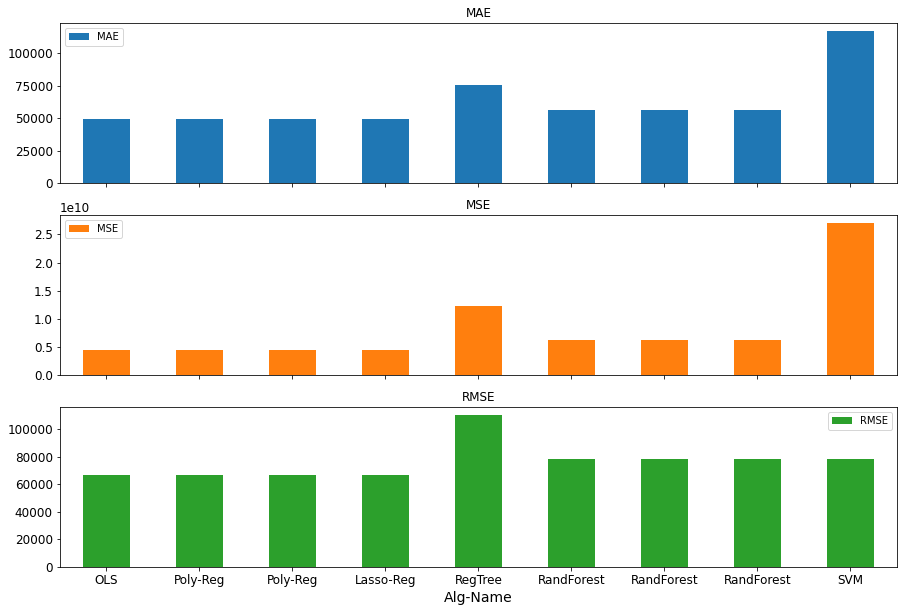

In [52]:
axes = performanceDF.plot.bar(rot=0, subplots=True, figsize=(15,10))
axes[1].legend(loc=2)

## Ohrfeige-Funktion
Mit der nachfolgenden Funktion werden auf einen Schlag alle Algorithmen ausgeführt und anschließend vergleichend geplottet.

Mit dieser Funktion können "gut" folgende Punkte der [Short-List-Models-Checklist](19112020-ShortListModels) abgeabreitet werden:<br>
- [Quick& Dirty Modeling](07112020200718-DataModelingQuickDirty)<br>
- [Measuer-Performance](07112020200718-MeasurePerofrmance)<br>
- [Feature Importance per Model](07112020200718-FeatureImportance)<br>
- [Error-Analysis per Model](07112020200718-AnalyzingError)<br><br>

somit bestehen "nur noch" für folgende Aufgaben ein Manueller Handlungsbredarf:<br>
- [Feature-Selection](07112020200718-FeatureSelectionAndEngineering)<br>
- [Repetition](07112020200718-Repetition)<br>
- [Summary](07112020200718-SummaryPromissingModels)<br>


In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

C:\Users\1810837475\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6340902440107.633, tolerance: 22103585513.765118
  model = cd_fast.enet_coordinate_descent(
<ipython-input-54-5b712e516128>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(trainData, trainLabels)
C:\Users\1810837475\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


        Alg-Name            MAE           MSE           RMSE  \
0            OLS   49483.498062  4.462016e+09   66798.320259   
1          Lasso   49458.054756  4.461389e+09   66793.630247   
2  Decision-Tree   75607.395833  1.227796e+10  110805.964643   
3  Random-Forest   56745.107323  6.290655e+09   79313.646527   
4     SVM-Linear  117353.232316  2.709863e+10  164616.612117   

                                          importance  \
0  [[-54351.712905772016, -55446.55764966471, 144...   
1  [-54137.139356899715, -55013.21442234788, 1439...   
2  [0.06593142858806791, 0.05572574053447584, 0.0...   
3  [0.0584072463130713, 0.05506386172811656, 0.04...   
4  [[0.2783439229196297, 0.16175094244728438, -0....   

                                         predictions  
0  [[422400.0], [272448.0], [229056.0], [203968.0...  
1  [422149.5469463768, 272063.34422259615, 228721...  
2  [445400.0, 373700.0, 500001.0, 184200.0, 11630...  
3  [482865.64, 421764.35, 295235.08, 192686.0, 14...  
4  

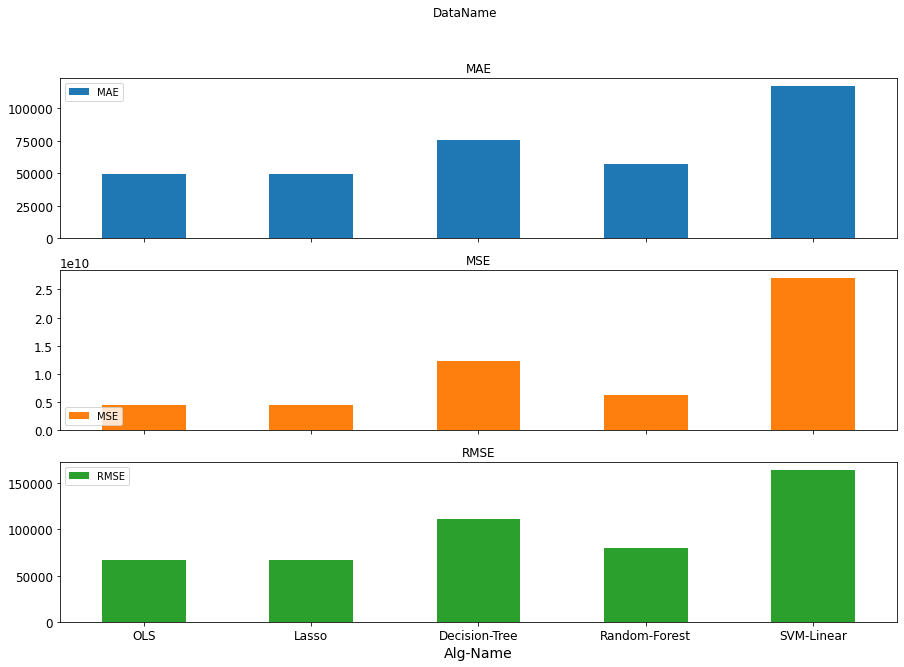

In [54]:
def ohrfeige(trainData, trainLabels, testData, testLabels, DataName):
    resultlistOhrfeige = []
    names = ["OLS",
             "Lasso",
             "Decision-Tree",
             "Random-Forest",
             "SVM-Linear"
            ]   # "Linear SVM",

    regressors = [
         LinearRegression(),
         Lasso(alpha=0.01, max_iter=1000),
         DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(n_estimators=100),
         svm.SVC(kernel='linear')
         ]
    
    
    for name, reg in zip(names, regressors):
        reg.fit(trainData, trainLabels)
        predictions_reg = reg.predict(testData)
        mae = mean_absolute_error(testLabels, predictions_reg)
        mse = mean_squared_error(testLabels, predictions_reg)
        rmse = np.sqrt(mse)
        try:
            importance = reg.coef_
        except:
            importance = reg.feature_importances_
        resultlistOhrfeige.append([name, mae, mse, rmse, importance, predictions_reg])
        
    
    titles = ["Alg-Name", "MAE", "MSE", "RMSE", "importance", "predictions"]
    ohrfeigePlotList = pd.DataFrame(resultlistOhrfeige, columns=titles)
    
    ohrfeigePlotList = ohrfeigePlotList[["Alg-Name", "MAE", "MSE", "RMSE"]]
    #ohrfeigePlotList = ohrfeigePlotList.drop("importance", axis=1) # drop labels for training set
    ohrfeigePlotList = ohrfeigePlotList.set_index('Alg-Name')
    axes = ohrfeigePlotList.plot.bar(rot=0, subplots=True, figsize=(15,10), title=DataName)
    axes[1].legend(loc=3)
    
    performanceDFOhrfeige = pd.DataFrame(resultlistOhrfeige, columns=titles)
    return(performanceDFOhrfeige)

# Bug in Numpy
# https://stackoverflow.com/questions/63761366/numpy-linalg-linalgerror-svd-did-not-converge-in-linear-least-squares-on-first
while True:
    try: 
        results = ohrfeige(train_set, train_labels, test_set, test_labels, "DataName")
        break
    except:
        continue
        
print(results)

# [Fine-Tuning]()